# Caracterización de un ataque DDoS en una topología de red bipartita
# Matemáticas Discretas 1.

---

Presentado por:

**Juan Diego Rozo Álvarez**  
**Maria Catalina Rodriguez Cardona**  
**Omar Alejandro Blanco Pineda**

---

## Introducción

Este documento consiste en la simulación práctica de una red de comunicaciones entre usuarios y servidores, modelada mediante un **grafo bipartito no dirigido**. El objetivo principal es **caracterizar el comportamiento de un ataque de denegación de servicio distribuido (DDoS)** desde una perspectiva matemática, utilizando herramientas de teoría de grafos vistas en el curso de Matemáticas Discretas 1.

En un ataque DDoS, múltiples usuarios (o nodos controlados por un atacante) generan grandes cantidades de solicitudes hacia uno o varios servidores, con el fin de sobrecargarlos y provocar la interrupción del servicio. Este fenómeno puede representarse naturalmente como un grafo bipartito, donde los nodos se dividen en dos conjuntos disjuntos:

- Un conjunto de **usuarios** que originan las solicitudes.
- Un conjunto de **servidores** que reciben dichas solicitudes.

Las **aristas** del grafo representan las conexiones o solicitudes realizadas por los usuarios a los servidores. Además, el **peso de cada arista** indica la cantidad de veces que se ha establecido una conexión entre un usuario y un servidor en particular.

## Objetivos

- Modelar una red bipartita que represente la interacción entre usuarios y servidores.
- Simular el comportamiento de una serie de conexiones de red para identificar un posible ataque DDoS por parte de un usuario con una sobrecarga de conexiones.
- Visualizar el grafo resultante y analizar los grados de los nodos.
- Identificar patrones de tráfico que evidencien una sobrecarga sobre ciertos nodos del sistema.

## Herramientas utilizadas

- Python (versión 3.10+)
- Librerías:
  - `networkx` para modelar y visualizar grafos.
  - `matplotlib` para graficación de datos.
  - `random` para la generación aleatoria de conexiones y cantidad de nodos.



In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Definición del grafo en código
---

Para representar la red bipartita que simula la interacción entre usuarios y servidores, se implementó una clase en Python llamada `networkSimulation`. Esta clase encapsula tanto la generación aleatoria de nodos como la creación de conexiones entre ellos, y proporciona funciones para visualizar el grafo resultante y analizar su estructura.

### Estructura del grafo

- El grafo se modela como **no dirigido** y **bipartito**, con dos conjuntos disjuntos de nodos:
  - `user`: conjunto de nodos que representan a los usuarios o clientes (posibles agentes del ataque DDoS).
  - `server`: conjunto de nodos que representan a los servidores.
- Las **aristas** representan conexiones entre usuarios y servidores.
- El **peso** de cada arista indica cuántas veces ha ocurrido esa conexión.

### Componentes principales del código

- `construir_diccionarios(a, b)`: genera un número aleatorio de nodos para cada conjunto, en un rango determinado.
- `construir_red(total_conexiones)`: establece una cantidad dada de conexiones aleatorias entre nodos de los dos conjuntos.
- `graficar_grafo_bipartito()`: visualiza el grafo usando `networkx`, mostrando los nodos, aristas y pesos de cada conexión.
- `graficar_diccionario_barras()`: función adicional que permite visualizar la distribución de conexiones (grado) de cada nodo mediante gráficas de barras, donde se codifica la intensidad de las conexiones usando una paleta de colores entre azul (mínimo) y rojo (máximo).

Esta estructura permite modelar comportamientos anómalos como los observados en ataques de denegación de servicio, donde un subconjunto reducido de servidores puede verse saturado por múltiples usuarios.

A continuación, se presenta el código que define y construye la simulación del grafo.


In [ ]:
class networkSimulation:
    '''
    Clase para simular y visualizar una red bipartita entre usuarios y servidores.

    Esta clase genera una cantidad aleatoria de nodos en un rango [a,b] para usuarios y servidores
    y crea conexiones aleatorias entre ellos simulando una red.
    Se pueden visualizar tanto el grafo bipartito como las estadísticas de conexiones por nodo.

    Nota: para representar los nodos y sus grados, se usaron diccionarios dado
    que es sencillo rastrear un elemento del mismo y actualizar un valor al cual referencia.
    En este caso, el elemento es la llave (key) y el valor es la referencia (value) tieniendo
    la siguiente forma:

    key : value    <-->    nodo : grado
    '''

    def __init__(self) -> None:
        '''
        user : dict
        Diccionario que contiene los nodos de usuario. Las claves son identificadores
        de usuario (como 'u0', 'u1', ...) y los valores representan la cantidad de
        conexiones (grado) que tiene cada uno.

        server : dict
        Diccionario que contiene los nodos de servidor. Las claves son identificadores
        de servidor (como 's0', 's1', ...) y los valores son su grado de conexión.

        relation : dict
        Diccionario con las relaciones entre usuarios y servidores. Las claves son
        tuplas (usuario, servidor) y los valores representan cuántas veces ocurrió
        esa conexión.
        '''
        self.user={}
        self.server={}
        self.relation={}
        pass

    def _generar_diccionario_nodos(self, name:str, a:int, b:int):
        '''
        Método privado para generar un diccionario de nodos con identificadores únicos
        dentro de un rango aleatorio [a, b].
        '''
        conjunto_nodos={}
        cantidad_ips=random.randint(a,b)

        for ip in range(cantidad_ips):
            conjunto_nodos.setdefault(f"{name}{ip}", 0)

        return conjunto_nodos

    def construir_diccionarios(self, a:int ,b:int):
        '''
        Inicializa los diccionarios de usuarios y servidores con cantidad aleatoria de nodos,
        dentro de un rango aleatorio [a,b], haciendo uso del método privado _generar_diccionario_nodos.
        Los elementos de self.user se llamarán u0, u1, ..., y los de self.server s0, s1, ...
        '''
        self.user=self._generar_diccionario_nodos("u", a, b)
        self.server=self._generar_diccionario_nodos("s", a, b)


    def construir_red(self, total_conexiones):
        '''
        Genera conexiones aleatorias entre usuarios y servidores, actualizando el
        diccionario de relaciones y los grados de los nodos, recordando que, en cada diccionario:

        key : value    <-->    nodo : grado
        '''
        user=list(self.user.keys())
        server=list(self.server.keys())

        cardinal_user=len(user)
        cardinal_server=len(server)

        for conexion in range(total_conexiones):
            # Se escoje un numero aleatorio entre 0 y el *cardinal del conjunto* - 1, para evitar IndexOfBound
            random_number1=random.randint(0,cardinal_user-1)
            random_number2=random.randint(0,cardinal_server-1)

            # Se selecciona un elemento aleatorio de U que pertenece a self.user y uno de S que pertenece a self.server.
            random_user=user[random_number1]
            random_server=server[random_number2]

            conexion_usuario_servidor=(random_user, random_server)

            # Se aumentan los grados de U y S en self.user y self.server
            self.user[random_user]+=1
            self.server[random_server]+=1

            # Se relacionan U y S en una tupla de tal forma que: U --> S. Por lo tanto, (U,S) pertenece a self.relation.
            self.relation.setdefault(conexion_usuario_servidor,0)
            self.relation[conexion_usuario_servidor]+=1


    def graficar_grafo_bipartito(self):
        '''
        Dibuja un grafo bipartito con los usuarios y servidores, donde las aristas
        indican relaciones. Se muestra el peso (frecuencia) de cada conexión.

        El grafo se dibuja a partir del diccionario self.relation, que contiene las conexiones
        entre usuarios y servidores.
        '''
        GRAFO=nx.Graph()

        user=list(self.user.keys())
        server=list(self.server.keys())

        GRAFO.add_nodes_from(user, bipartite=0)
        GRAFO.add_nodes_from(server, bipartite=1)

        for conexion in self.relation:
            current_user=conexion[0]
            current_server=conexion[1]
            grado=self.relation[conexion]
            GRAFO.add_edge(current_user, current_server, weight=grado)

        pos = nx.bipartite_layout(GRAFO, user)

        for node in pos:
            x, y = pos[node]
            pos[node] = (x * 3.0, y * 4.0)

        plt.figure(figsize=(14, 8))

        nx.draw_networkx_nodes(GRAFO, pos, nodelist=user, node_color='skyblue', label='Usuarios')
        nx.draw_networkx_nodes(GRAFO, pos, nodelist=server, node_color='lightgreen', label='Servidores')
        nx.draw_networkx_edges(GRAFO, pos)
        nx.draw_networkx_labels(GRAFO, pos, font_size=9)

        etiquetas = nx.get_edge_attributes(GRAFO, 'weight')

        nx.draw_networkx_edge_labels(GRAFO, pos, edge_labels=etiquetas)
        plt.title("Red Usuario - Servidor (Bipartita)")
        plt.axis("off")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Definición de soportes visuales adicionales
---

Con el fin de complementar la representación visual del grafo bipartito y facilitar el análisis de la distribución de conexiones (grados) en la red, se definieron tres funciones auxiliares que permiten visualizar, imprimir y analizar estadísticamente la cantidad de conexiones asociadas a cada nodo.

### Función: `graficar_diccionario_barras`

Esta función genera una gráfica de barras a partir de un diccionario cuyas claves representan identificadores de nodos (usuarios, servidores o pares usuario-servidor) y cuyos valores indican el número de conexiones asociadas a cada uno. La visualización emplea una paleta de colores entre azul y rojo (`coolwarm`), en la que las barras con valores más altos se muestran más rojas, lo que permite identificar visualmente los nodos más activos o saturados.

#### Parámetros:
- `titulo` (str): título principal de la gráfica.
- `nombre_eje_x` (str): etiqueta para el eje X.
- `nombre_eje_y` (str): etiqueta para el eje Y.
- `diccionario` (dict): diccionario cuyas claves y valores serán graficados.

Este tipo de soporte visual es útil para:
- Detectar servidores sobrecargados por muchas conexiones.
- Identificar usuarios con actividad inusual.
- Observar la distribución general del tráfico en la red.

---

### Función: `imprimir_valores_y_grados`

Esta función imprime en consola los contenidos de un diccionario en un formato claro que asocia a cada nodo su grado de conexión. Aunque no es una representación gráfica, es útil como salida auxiliar para verificar rápidamente la estructura interna de los datos sin necesidad de graficarlos.

#### Parámetros:
- `diccionario` (dict): diccionario con los nodos y sus grados.

---

### Función: `obtener_max_conexiones_multiple`

Esta función permite identificar uno o más elementos que presentan la mayor cantidad de conexiones dentro de un diccionario. Es especialmente útil para localizar los nodos que podrían estar involucrados en un ataque DDoS (por ejemplo, un servidor con sobrecarga, o un cliente que envía muchas solicitudes).

#### Parámetros:
- `diccionario` (dict): Diccionario en el cual se desea buscar el o los elementos con valor máximo.

#### Retorno:
- Una tupla con:
  - Una lista de claves (usuarios, servidores o pares) con el valor más alto.
  - El valor máximo en cuestión (número de conexiones).

Este análisis permite, por ejemplo:
- Detectar **IP objetivo** de un ataque (servidor más solicitado).
- Identificar **IPs sospechosas** que generan mucho tráfico saliente (usuarios más activos).


In [ ]:
def graficar_diccionario_barras(titulo:str, nombre_eje_x:str, nombre_eje_y:str, diccionario:dict):
    '''
    Imprime las claves y valores de un diccionario en formato de grados por IP.
    Útil para ver los grados de los nodos.
    '''
    # Ordenar por clave para mantener consistencia en eje X
    claves = list(diccionario.keys())
    valores = list(diccionario.values())

    # Convertir claves complejas (como tuplas) a strings para mostrar
    etiquetas = [str(k) for k in claves]

    # Normalizar valores para mapa de color (entre 0 y 1)
    max_valor = max(valores) if valores else 1
    colores_normalizados = [v / max_valor for v in valores]

    # Crear colores entre azul y rojo
    colormap = plt.colormaps.get_cmap('coolwarm')  # azul -> rojo
    colores = [colormap(c) for c in colores_normalizados]

    # Crear gráfica
    fig, ax = plt.subplots(figsize=(12, 6))
    barras = ax.bar(etiquetas, valores, color=colores)

    # Títulos
    ax.set_title(titulo)
    ax.set_xlabel(nombre_eje_x)
    ax.set_ylabel(nombre_eje_y)

    # Rotar etiquetas si son largas
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def imprimir_valores_y_grados(diccionario):
    '''
    Imprime las claves y valores de un diccionario en formato de grados por IP.
    Útil para ver los grados de los nodos.
    '''
    for i, key in enumerate(diccionario):
        print(f"IP {i}: {key}   -->  {diccionario[key]}")
    print()



def obtener_max_conexiones_multiple(diccionario: dict):
    """
    Retorna una lista con todas las claves que tienen el valor máximo en el diccionario,
    junto con dicho valor.

    Parámetros:
    - diccionario (dict): Diccionario donde las claves son nodos o tuplas (usuario-servidor)
                          y los valores representan el grado de conexión.

    Retorna:
    - (lista_claves_max, valor_max): Tupla donde el primer elemento es una lista con las claves
      que tienen el valor máximo, y el segundo es el valor en sí.
    """

    valor_max = max(diccionario.values())
    claves_max = [clave for clave, valor in diccionario.items() if valor == valor_max]
    return claves_max, valor_max



# Implementación del código
---
Una vez definida la clase y las funciones de impresión, podemos empezar a construir nuestra simulación.

In [ ]:
# Se instancia el objeto red_de_computadores.
red_de_computadores=networkSimulation()

# Se inicializan los diccionarios de User y Server que contienen de [a=5,b=15] nodos.
red_de_computadores.construir_diccionarios(5,15)

# Se construyen n=48 conexiones en total
red_de_computadores.construir_red(60)

imprimir_valores_y_grados(red_de_computadores.relation)

IP 0: ('u1', 's1')   -->  1
IP 1: ('u3', 's5')   -->  3
IP 2: ('u8', 's6')   -->  1
IP 3: ('u6', 's7')   -->  1
IP 4: ('u1', 's3')   -->  2
IP 5: ('u3', 's3')   -->  2
IP 6: ('u6', 's1')   -->  1
IP 7: ('u0', 's6')   -->  1
IP 8: ('u1', 's7')   -->  4
IP 9: ('u4', 's1')   -->  1
IP 10: ('u8', 's7')   -->  1
IP 11: ('u0', 's4')   -->  1
IP 12: ('u5', 's5')   -->  3
IP 13: ('u8', 's2')   -->  1
IP 14: ('u5', 's1')   -->  1
IP 15: ('u3', 's2')   -->  2
IP 16: ('u2', 's2')   -->  1
IP 17: ('u2', 's3')   -->  1
IP 18: ('u1', 's5')   -->  4
IP 19: ('u7', 's1')   -->  1
IP 20: ('u7', 's5')   -->  1
IP 21: ('u8', 's0')   -->  1
IP 22: ('u2', 's1')   -->  1
IP 23: ('u7', 's3')   -->  1
IP 24: ('u4', 's6')   -->  1
IP 25: ('u0', 's1')   -->  2
IP 26: ('u5', 's0')   -->  1
IP 27: ('u8', 's4')   -->  1
IP 28: ('u4', 's5')   -->  1
IP 29: ('u2', 's5')   -->  1
IP 30: ('u0', 's5')   -->  1
IP 31: ('u8', 's1')   -->  1
IP 32: ('u3', 's1')   -->  1
IP 33: ('u6', 's0')   -->  1
IP 34: ('u4', 's7')   --

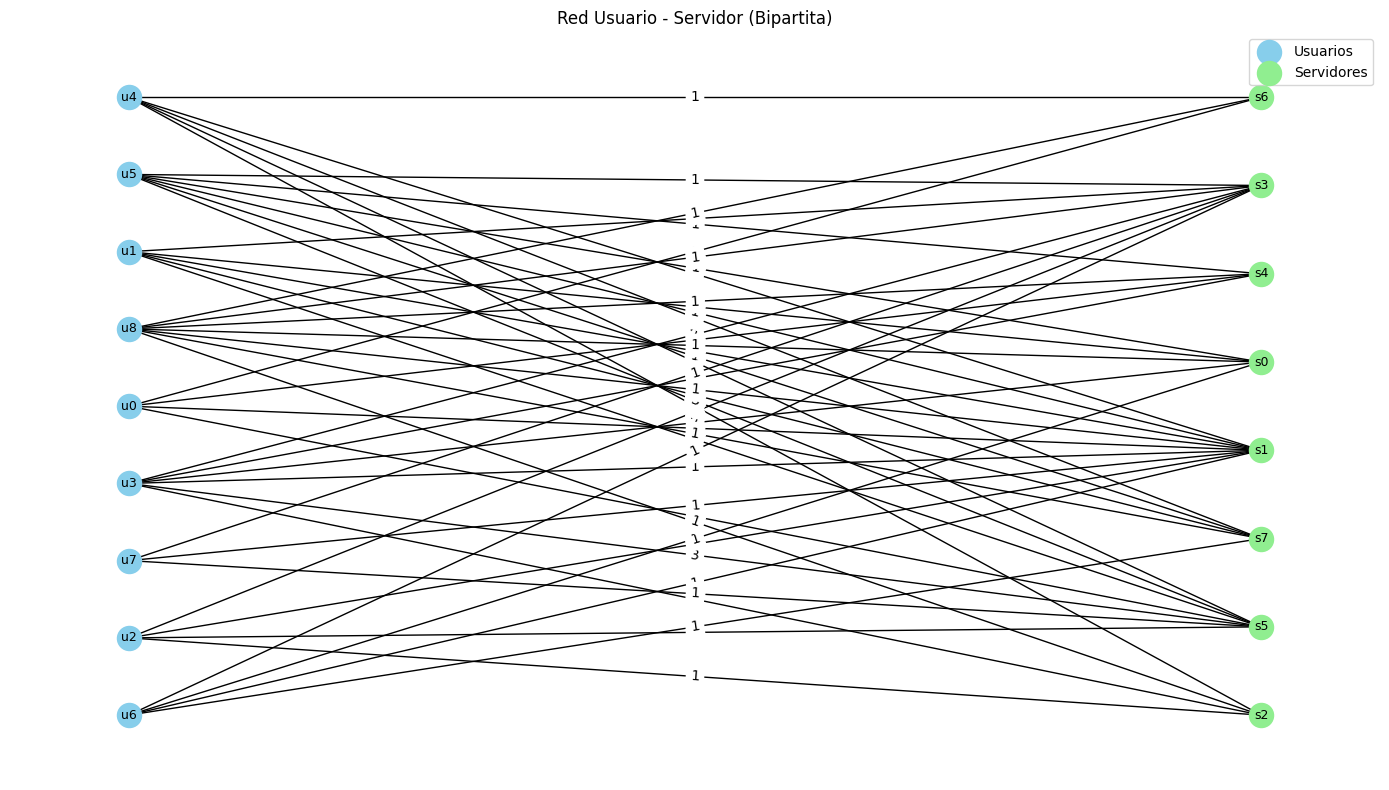

In [ ]:
red_de_computadores.graficar_grafo_bipartito()

# Obtención de resultados finales
---

Finalmente, obtenemos una representación visual y analítica del problema, con el objetivo de detectar comportamientos que podrían asociarse a un ataque DDoS.

A partir de la simulación realizada, se generan gráficas de barras que muestran la distribución de conexiones tanto en los usuarios como en los servidores, así como entre cada par usuario-servidor. Estas visualizaciones permiten identificar fácilmente qué nodos presentan una actividad anormalmente alta, lo cual es indicativo de posibles patrones maliciosos.

Con el apoyo de la función `obtener_max_conexiones_multiple`, se extraen los **nodos más activos** o **más atacados**:

- **Usuarios con más conexiones**: podrían representar nodos comprometidos o bots que están generando tráfico excesivo hacia los servidores.
- **Servidores con más conexiones**: si un servidor está siendo solicitado con mucha más frecuencia que los demás, podría estar siendo víctima de un ataque DDoS.
- **Relaciones más frecuentes** (pares usuario-servidor): permiten identificar si un conjunto específico de usuarios está apuntando reiteradamente a un servidor en particular.

Estos resultados constituyen una forma sencilla pero poderosa de observar dinámicas anómalas dentro de una red, valiéndose de los conceptos de grafos bipartitos y grado de nodos, vistos en el curso de Matemáticas Discretas 1.

La información extraída visualmente y numéricamente permite sentar las bases para el diseño de mecanismos de detección de ataques, o incluso para realizar filtrado o mitigación temprana del tráfico malicioso.


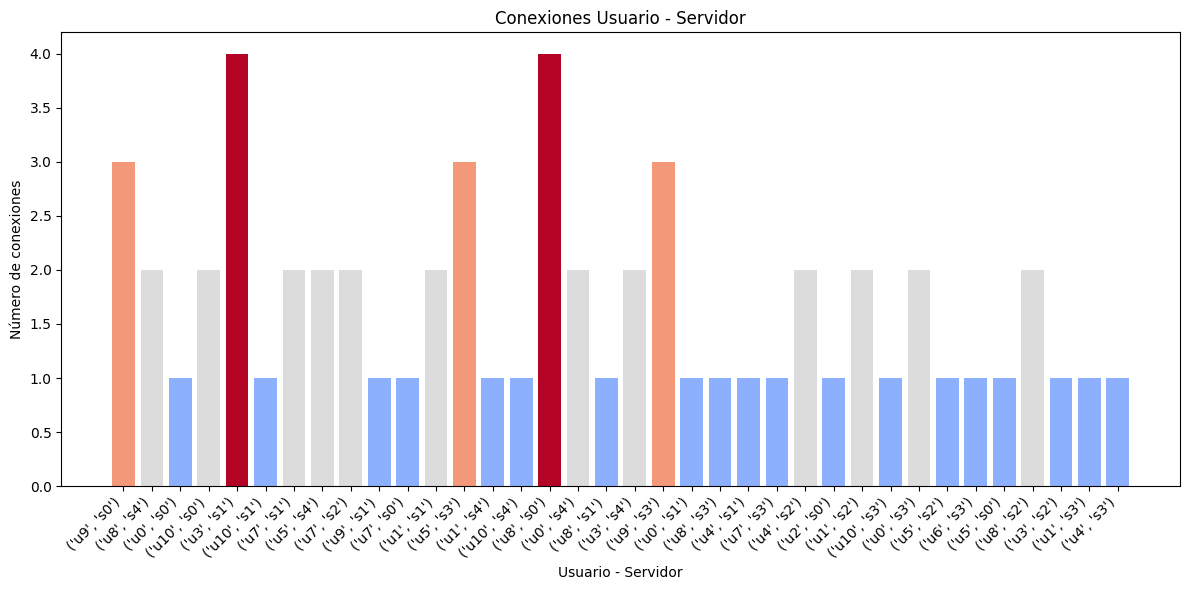

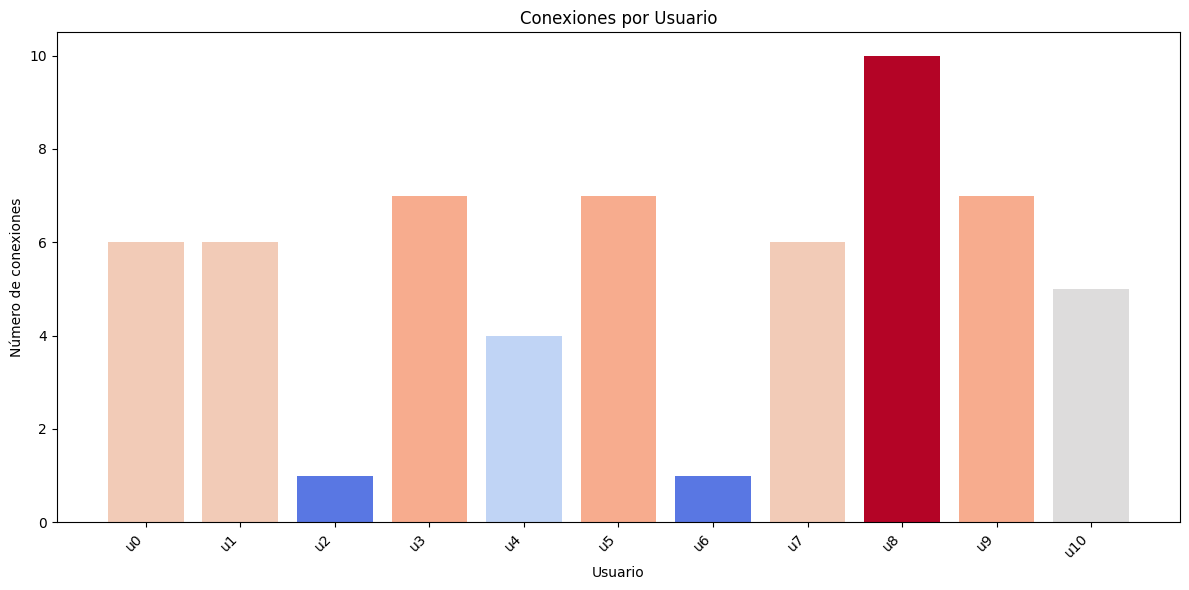

Usuarios con más conexiones (['u8']): 10
Servidores con más conexiones (['s3']): 14
Conexiones más frecuentes ([('u3', 's1'), ('u8', 's0')] veces): 4


In [ ]:
# se guardan los nodos
red=red_de_computadores.relation
users=red_de_computadores.user
servers=red_de_computadores.server

# Se grafican las conexiones y su número de ocurrencias para identificar un posible ataque DDoS
graficar_diccionario_barras(
    "Conexiones Usuario - Servidor",
    "Usuario - Servidor",
    "Número de conexiones",
    red
)


# Se grafican las conexiones POR USUARIO, distinguiendo el total de conexiones a servidores que este tiene
# para identificar si se trata de un BotNet
graficar_diccionario_barras(
    "Conexiones por Usuario",
    "Usuario",
    "Número de conexiones",
    users
)

botnets, conexiones = obtener_max_conexiones_multiple(users)
print(f"Usuarios con más conexiones ({botnets}): {conexiones}")

servidores_sobrecargados, conexiones = obtener_max_conexiones_multiple(servers)
print(f"Servidores con más conexiones ({servidores_sobrecargados}): {conexiones}")

relaciones_max, repeticiones = obtener_max_conexiones_multiple(red)
print(f"Conexiones más frecuentes ({relaciones_max} veces): {repeticiones}")

